In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
from utils import _get_logger, collate_fn
from torch.utils.data import DataLoader
import numpy as np
from PIL import ImageDraw, Image, ImageFont
import pandas as pd
import collections
from utils.detection_utils import visualize_boxes_and_labels_on_image_array

pd.set_option("display.max_colwidth", None)
logger = _get_logger(__name__)

## COCO:

In [3]:
# Utilities to load in the COCO dataset
from utils.coco import get_coco, get_coco_api_from_dataset, CocoEvaluator
from utils.coco.coco_transforms import RandomHorizontalFlip, ToTensor, Compose

In [4]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [5]:
root = "/Users/ayushman/Desktop/Datasets/coco/"
tfms = Compose([ToTensor(), RandomHorizontalFlip(prob=0.5)])

# coco train dataset
ds = get_coco(root=root, image_set="train", transforms=tfms)

loading annotations into memory...
Done (t=17.23s)
creating index...
index created!


In [6]:
dl = DataLoader(ds, batch_size=5, collate_fn=collate_fn, num_workers=3)
bs = next(iter(dl)) # grab one batch
image, target, idx = bs # unpack batch

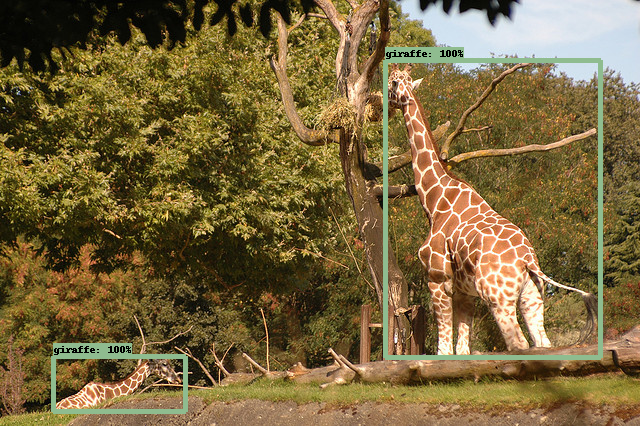

In [7]:
im = visualize_boxes_and_labels_on_image_array(
    image=image[1].permute(1, 2, 0).numpy(),
    boxes=target[1]['boxes'].numpy(),
    scores=None,
    classes=target[1]['labels'].numpy(),
    label_map=COCO_INSTANCE_CATEGORY_NAMES,
)

im

In [8]:
# coco validation dataset
tfms = Compose([ToTensor(), RandomHorizontalFlip(prob=0.5)])
ds= get_coco(root=root, image_set="val", transforms=tfms)

loading annotations into memory...
Done (t=0.65s)
creating index...
index created!


In [9]:
dl = DataLoader(ds, batch_size=5, collate_fn=collate_fn, num_workers=3)
bs = next(iter(dl)) # grab one batch
image, target, idx = bs # unpack batch

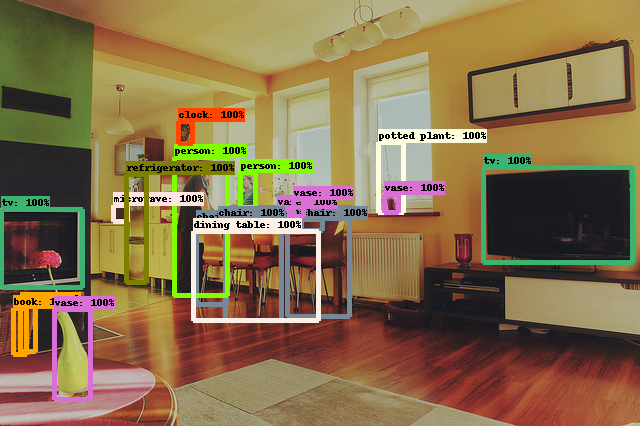

In [10]:
im = visualize_boxes_and_labels_on_image_array(
    image=image[0].permute(1, 2, 0).numpy(),
    boxes=target[0]['boxes'].numpy(),
    scores=None,
    classes=target[0]['labels'].numpy(),
    label_map=COCO_INSTANCE_CATEGORY_NAMES,
)

im

## VOC :

In [11]:
# Utilities to load in the Pascal dataset
from utils.pascal import get_pascal
from utils.pascal.pascal_transforms import compose_transforms
import albumentations as A

In [13]:
tfms = compose_transforms([A.HorizontalFlip(p=0.5)])
tfms

Compose([
  HorizontalFlip(always_apply=False, p=0.5),
  ToFloat(always_apply=True, p=1.0, max_value=255.0),
  ToTensorV2(always_apply=True, p=1.0),
], p=1.0, bbox_params={'format': 'pascal_voc', 'label_fields': ['class_labels'], 'min_area': 0.0, 'min_visibility': 0.0}, keypoint_params=None, additional_targets={})

In [14]:
test_im_pth = "/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_test/Images/"
test_ann_pth = "/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_test/Annotations/"

train_im_pth = "/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_train_val/Images/"
train_ann_pth = "/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_train_val/Annotations/"

In [15]:
trn_ds  = get_pascal(train_ann_pth, train_im_pth, "train", transforms=tfms)
test_ds = get_pascal(test_ann_pth, test_im_pth,  "test",  transforms=tfms)

[10/03 22:33:12 utils.pascal.pascal_utils]: DataFrame generated is saved to pascal_train.csv
[10/03 22:33:14 utils.pascal.pascal_utils]: DataFrame generated is saved to pascal_test.csv


In [16]:
df = pd.read_csv("pascal_train.csv")
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,labels
0,/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_train_val/Images/007826.jpg,500,375,diningtable,80,217,320,273,11
1,/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_train_val/Images/007826.jpg,500,375,chair,197,193,257,326,9
2,/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_train_val/Images/007826.jpg,500,375,chair,139,184,185,231,9
3,/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_train_val/Images/007826.jpg,500,375,chair,258,180,312,314,9
4,/Users/ayushman/Desktop/Datasets/voc2007/pascal_voc_2007_train_val/Images/007826.jpg,500,375,chair,10,195,93,358,9


In [ ]:
# Create category list for PASCAL_DATASET
cs = df["class"].unique()
ls = df["labels"].unique()

PASCAL_INSTANCE_CATEGORY_NAMES = list(np.zeros(len(ls) + 1))

for i, x in enumerate(ls):
    PASCAL_INSTANCE_CATEGORY_NAMES[x] = cs[i]

PASCAL_INSTANCE_CATEGORY_NAMES

In [ ]:
dl = DataLoader(trn_ds, collate_fn=collate_fn, batch_size=5)
bs = next(iter(dl)) # grab one batch
image, target, idx = bs # unpack batch

In [ ]:
im = visualize_boxes_and_labels_on_image_array(
    image=image[1].permute(1, 2, 0).numpy(),
    boxes=target[1]['boxes'].numpy(),
    scores=None,
    classes=target[1]['labels'].numpy(),
    label_map=PASCAL_INSTANCE_CATEGORY_NAMES,
)

im

In [ ]:
dl = DataLoader(test_ds, collate_fn=collate_fn, batch_size=8)
bs = next(iter(dl)) # grab one batch
image, target, idx = bs # unpack batch

im = visualize_boxes_and_labels_on_image_array(
    image=image[3].permute(1, 2, 0).numpy(),
    boxes=target[3]['boxes'].numpy(),
    scores=None,
    classes=target[3]['labels'].numpy(),
    label_map=PASCAL_INSTANCE_CATEGORY_NAMES,
)

im

In [ ]:
# convert dataset to coco format
coco = get_coco_api_from_dataset(dl.dataset)
evaluator = CocoEvaluator(coco, ["bbox"])